In [2]:
# %pip install seaborn

     |████████████████████████████████| 285 kB 834 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [59]:
# %pip install sklearn

     |████████████████████████████████| 24.9 MB 1.5 MB/s 
     |████████████████████████████████| 303 kB 12.2 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=0af06cc7315f1885f2118bf67ad50668b752f6d82dc71cf8d0eced5d8d167ece
  Stored in directory: /home/beloin/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as srn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [8]:
base = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [9]:
base.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
base.shape

(299, 13)

In [11]:
# confirmar a binaridade dos dados
np.unique(base.DEATH_EVENT)

array([0, 1])

In [12]:
print(len(base.loc[base.DEATH_EVENT == 0]))
print(len(base.loc[base.DEATH_EVENT == 1]))

203
96


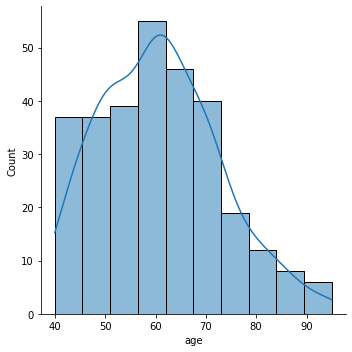

In [13]:
srn.displot(base.age, kind='hist', kde=True)

<AxesSubplot:xlabel='age', ylabel='serum_sodium'>

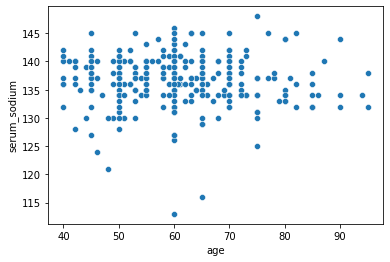

In [7]:
srn.scatterplot(x=base.age, y=base.serum_sodium)

In [8]:
base.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
# Aqui vemos se há algo de errado com nosso Dataset
base.isnull().sum() # np.isnan(base).sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Vimos que não há nada de errado com nossos dados. Agora podemos ou checar as relações entre os valores, ou tentar logo aplicar um algoritmo de ML para testar um exemplo no mundo real.

In [10]:
X = base.iloc[:,0:11].values # Importante serem apenas os valores
y = base.iloc[:,12].values
print('x:', X.shape, ',', 'y:',  y.shape)

x: (299, 11) , y: (299,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
prev = model.predict(X_test)

In [14]:
cf_matrix = confusion_matrix(y_test, prev)
cf_matrix

array([[56, 15],
       [ 4, 15]])

In [15]:
accuracy_score(y_test, prev)

0.7888888888888889

Testando com RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=1000)
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [17]:
prev = randomForestModel.predict(X_test)

In [18]:
cf_matrix2 = confusion_matrix(y_test, prev)
cf_matrix2

array([[62,  9],
       [ 8, 11]])

In [19]:
accuracy_score(y_test, prev)

0.8111111111111111

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

In [22]:
forest = ExtraTreesClassifier()
forest.fit(X_train, y_train)

ExtraTreesClassifier()

In [23]:
important = forest.feature_importances_
important

array([0.1367221 , 0.03176741, 0.1204659 , 0.04363694, 0.16069259,
       0.03891736, 0.11238099, 0.16514012, 0.11929678, 0.02702243,
       0.04395737])

Vimos que os aspectos mais importantes de X são [ 0, 2, 4, 6, 7, 8 ]

Vamos usar uma SVM para aplicar esses valores

In [24]:
prevForest = forest.predict(X_test)
accuracy_score(y_test, prevForest)

0.8111111111111111

In [25]:
svm = SVC()
X_train_svc = X_train[:, [0, 2, 4, 6, 7, 8]]
X_test_svc = X_test[:, [0, 2, 4, 6, 7, 8]]

In [26]:
svm.fit(X_train_svc, y_train)
prev_svm = svm.predict(X_test_svc)

In [27]:
accuracy_score(y_test, prev_svm)

0.7888888888888889

Mesmo com os dados mais importantes, ainda obtivemos uma menor acurácia.

Vamos tentar normalizar alguns dados para manter em uma base menor.

In [28]:
# Primeiro vamos contar os outliers.
q1 = base.quantile(0.25)
q3 = base.quantile(0.75)
iqr = q3 - q1

In [113]:
# Outliers inferiores
(base < q1 - (iqr * 1.5)).sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   7
serum_creatinine            0
serum_sodium                4
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [115]:
# Outliers superiores
(base > q3 + (iqr * 1.5)).sum()

age                          0
anaemia                      0
creatinine_phosphokinase    29
diabetes                     0
ejection_fraction            2
high_blood_pressure          0
platelets                   14
serum_creatinine            29
serum_sodium                 0
sex                          0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64

In [32]:
to_max_normalize = ['age', 'creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
X_2 = base
base[to_max_normalize] / base[to_max_normalize].max()

,age,creatinine_phosphokinase,platelets,ejection_fraction,serum_creatinine,serum_sodium,time
0,0.789474,0.074036,0.311765,0.2500,0.202128,0.878378,0.014035
1,0.578947,1.000000,0.309833,0.4750,0.117021,0.918919,0.021053
2,0.684211,0.018573,0.190588,0.2500,0.138298,0.871622,0.024561
3,0.526316,0.014120,0.247059,0.2500,0.202128,0.925676,0.024561
4,0.684211,0.020354,0.384706,0.2500,0.287234,0.783784,0.028070
...,...,...,...,...,...,...,...
294,0.652632,0.007760,0.182353,0.4750,0.117021,0.966216,0.947368
295,0.578947,0.231523,0.317647,0.4750,0.127660,0.939189,0.950877
296,0.473684,0.262053,0.872941,0.7500,0.085106,0.932432,0.975439
297,0.473684,0.306958,0.164706,0.4750,0.148936,0.945946,0.982456


Depois de conseguirmos no máximo 0.81 Já podemos finalizar :(
Mas antes, vamos plotar alguns dados para entender o que há de errado.

In [78]:
base.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Text(0.5, 1.0, 'Idade')

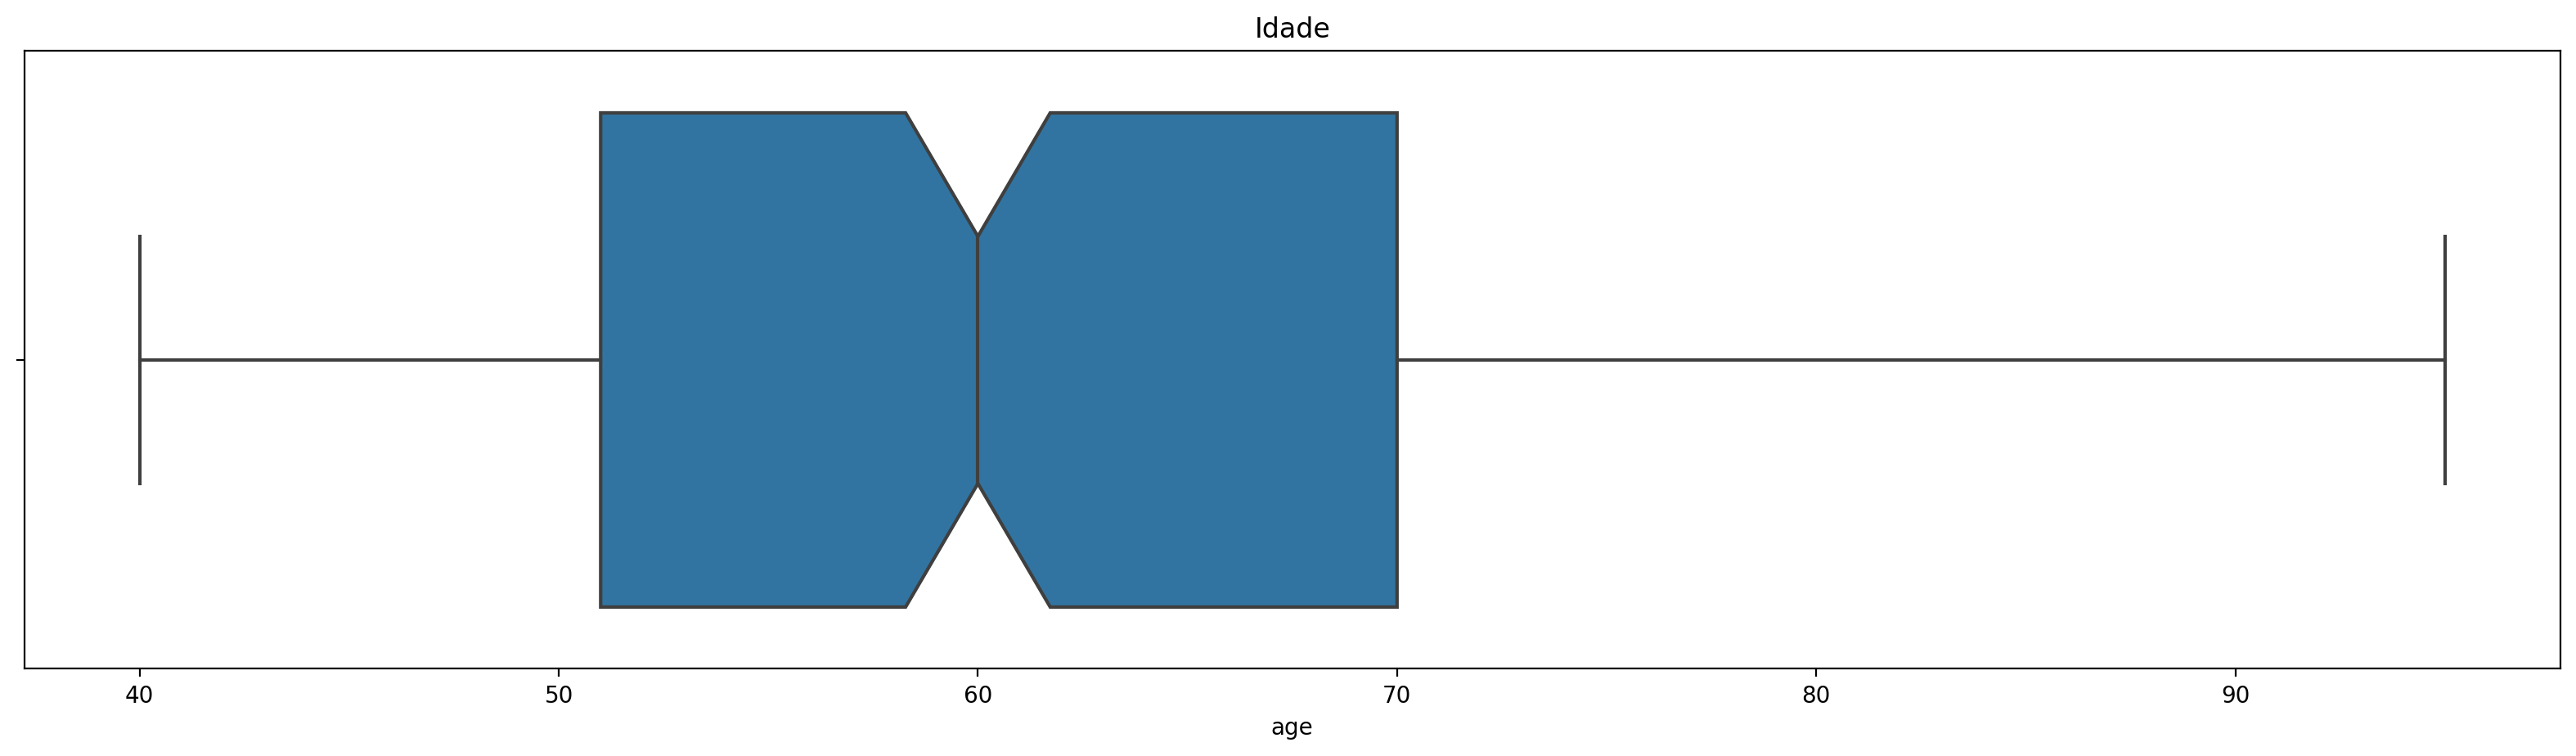

In [94]:
plt.figure(figsize=(20,5), dpi=200)
srn.boxplot(x=base.age, notch=True)
plt.title('Idade')

In [34]:
smoking_base = base[['smoking', 'DEATH_EVENT']]

In [35]:
smoking_true = smoking_base.loc[smoking_base.smoking == 1]
smoking_false = smoking_base.loc[smoking_base.smoking == 0]

In [36]:
smoking_dead = smoking_base.query('DEATH_EVENT == 1 & smoking == 1')
smoking_not_dead = smoking_base.query('DEATH_EVENT == 0 & smoking == 1')
not_smoking_dead = smoking_base.query('DEATH_EVENT == 1 & smoking == 0')
none_dead = smoking_base.query('DEATH_EVENT == 0 & smoking == 0')

In [37]:
base.values

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 0.000e+00, 6.000e+00,
        1.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 2.780e+02,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 2.800e+02,
        0.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 2.850e+02,
        0.000e+00]])

In [38]:
size = [['MORREU_FUMA', 'NÃO_MORREU_FUMA', 'MORREU_NÃO_FUMA', 'NÃO_MORREU_NÃO_FUMA'], [ len(smoking_dead), len(smoking_not_dead), len(not_smoking_dead), len(none_dead)]]
size_smoking_base = pd.DataFrame(size)
size_smoking_base.columns = size_smoking_base.iloc[0,:].values
size_smoking_base.drop(0)

,MORREU_FUMA,NÃO_MORREU_FUMA,MORREU_NÃO_FUMA,NÃO_MORREU_NÃO_FUMA
1,30,66,66,137
